In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

encoder_input = tf.keras.Input(shape=(28, 28, 1), name='original_img')
x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16, 3, activation='relu')(x)
encoder_output = layers.GlobalMaxPooling2D()(x)
encoder = tf.keras.Model(encoder_input, encoder_output, name='encoder')

encoder.summary()

decoder_input = tf.keras.Input(shape=(16,), name='encoded_img')
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation='relu')(x)
decoder = tf.keras.Model(decoder_input, decoder_output, name='decoder')

decoder.summary()

autoencoder_input = tf.keras.Input(shape=(28, 28, 1), name='img')
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = tf.keras.Model(autoencoder_input, decoded_img, name='autoencoder')

autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

In [2]:
autoencoder.compile(optimizer='adam', loss='mse')
 
with tf.device('/device:GPU:0'):
  autoencoder.fit(train_images, train_images, epochs=10, batch_size=128, shuffle=True, validation_data=(test_images, test_images))

Epoch 1/10
469/469 [==============================] - 10s 17ms/step - loss: 0.0507 - val_loss: 0.0353
Epoch 2/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0326 - val_loss: 0.0305
Epoch 3/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0297 - val_loss: 0.0287
Epoch 4/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0282 - val_loss: 0.0276
Epoch 5/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0273 - val_loss: 0.0268
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0266 - val_loss: 0.0262
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0260 - val_loss: 0.0257
Epoch 8/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0255 - val_loss: 0.0253
Epoch 9/10
469/469 [==============================] - 7s 16ms/step - loss: 0.0251 - val_loss: 0.0248
Epoch 10/10
469/469 [==============================] - 8s 16ms/step - loss: 0.0247 - val_l

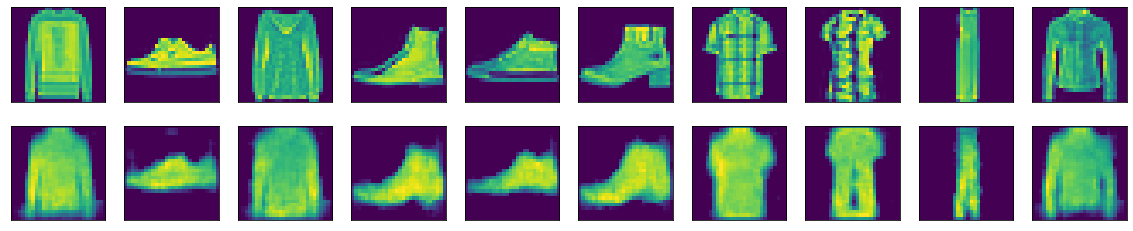

In [3]:
import matplotlib.pyplot as plt
import math
from numpy.random import shuffle




def plots(n=10):
    plt.figure(figsize=(20, 4))
    shuffle(test_images)
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(test_images[i].reshape(28, 28))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display Encoded
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(autoencoder.predict(test_images[i].reshape(1,28,28,1)).reshape(28,28))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

plots()